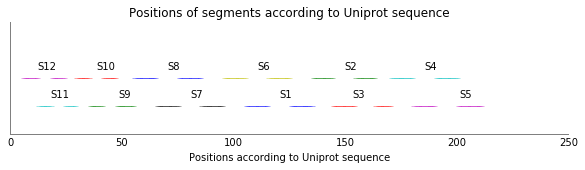

1891 unique mutations across all segments
There are 231 single mutations with known effects. They are found in 120 positions
Genotypes consisting of mutations with known effects:
Segment S1_scaled: 95.56% of genotypes (=58146)
Segment S2_scaled: 15.13% of genotypes (=12566)
Segment S3_scaled: 64.52% of genotypes (=44837)
Segment S4_scaled: 55.90% of genotypes (=35769)
Segment S5_scaled: 92.84% of genotypes (=67955)
Segment S6_scaled: 39.40% of genotypes (=25447)
Segment S7_scaled: 85.34% of genotypes (=13815)
Segment S8_scaled: 76.08% of genotypes (=45248)
Segment S9_scaled: 0.23% of genotypes (=189)
Segment S10_scaled: 94.07% of genotypes (=59763)
Segment S11_scaled: 97.43% of genotypes (=33793)
Segment S12_scaled: 15.01% of genotypes (=8685)


/Users/karen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [43]:
%run 'ks01_Data_import.ipynb'
notebook_prefix = 'ks04'
image_counter = Counter()

## Epistasis overview

#### Different segments

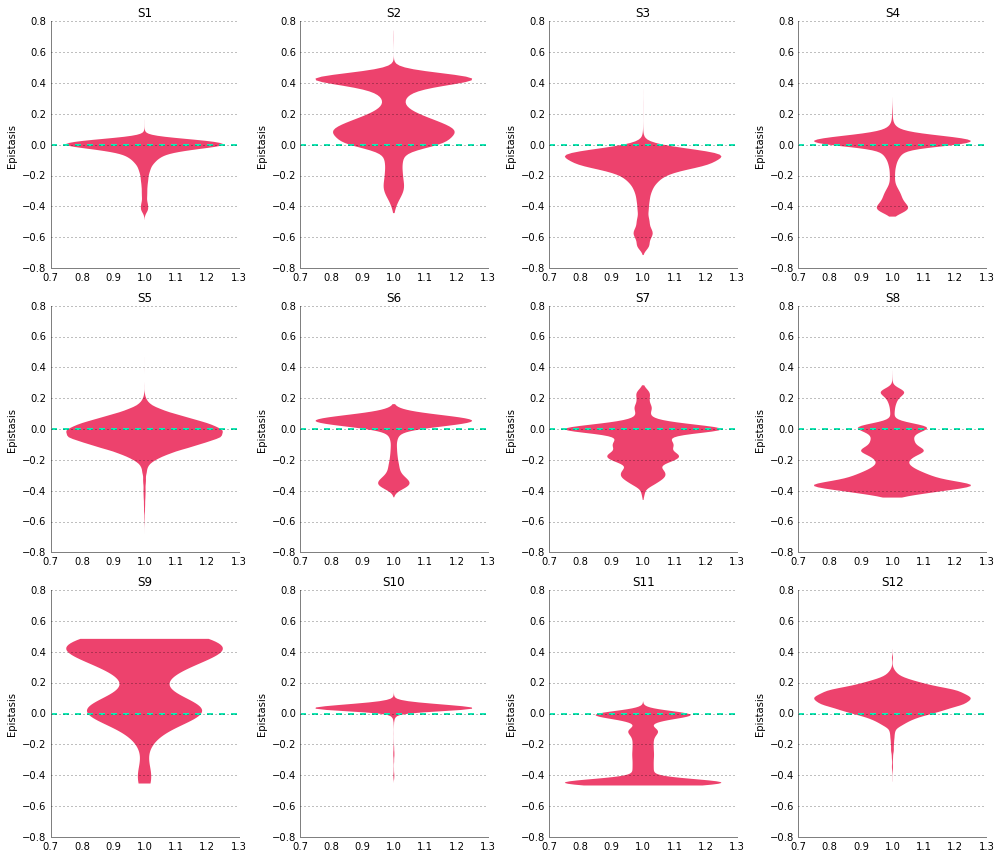

In [10]:
plot_better(width=14, height=12)
title = 'Distribution of epistasis in different segments'
facecolor = '#E91348'
edgecolor = 'none'
zero_color = '#13e9b4'
for index, item in enumerate(data_known_mutations_only.items()):
    segment_name, segment = item
    ax = plt.subplot(3,4,index+1)
    plt.title(segment_name.split('_')[0])
    vplot = plt.violinplot(segment.epistasis.values, showmeans=False, showmedians=False, showextrema=False)
    for patch in vplot['bodies']:
        patch.set_facecolor(facecolor)
        patch.set_alpha(0.8)
        patch.set_edgecolor(edgecolor)
    plt.axhline(0., ls='--', color=zero_color, lw=2)
    improve_plot(ax, grid='y')
    plt.ylabel('Epistasis')
    plt.ylim(-0.8, 0.8)
# plt.suptitle(title, fontsize=18)
plt.tight_layout()
save_image(image_counter, title, figures_folder, notebook_prefix)

In [49]:
# create a dictionary here!
singles_summary = OrderedDict()

for segment_name, segment_data in data_known_mutations_only.items():
    title = 'Epistasis plots for every single mutation segment %s' %segment_name.split('_')[0]
    single_mutations = sorted(list(set(':'.join(segment_data.mut_list_Scer.values).split(':'))))
    total_subplots = len(single_mutations)
    number_of_rows = total_subplots/4+1
    plot_better(width=14, height=4*number_of_rows)
    for index, mutation in enumerate(single_mutations):
        genotypes_with_current_mutation = segment_data[segment_data.mut_list_Scer.str.contains(mutation)] #buggy!
        singles_summary[mutation] = {'fitness': single_mut_fitness_dict[mutation]}#, genotypes_with_current_mutation.epistasis.median(), segment_name))
        ax = plt.subplot(number_of_rows,4,index+1)
        plt.title('%s genotypes\ncontaining mutation %s\n(fitness of single mutant: %.2f)' %(len(genotypes_with_current_mutation), mutation, single_mut_fitness_dict[mutation]))
        vplot = plt.violinplot(genotypes_with_current_mutation.epistasis.values, showmeans=False, showmedians=False, showextrema=False)
        for patch in vplot['bodies']:
            patch.set_facecolor(facecolor)
            patch.set_alpha(0.8)
            patch.set_edgecolor(edgecolor)
        plt.axhline(single_mut_fitness_dict[mutation], ls='--', color='#ffd700', lw=3)
        improve_plot(ax, grid='y')
        plt.ylabel('Epistasis')
        plt.ylim(-0.8, 0.8)
    plt.tight_layout()
    save_image(image_counter, title, figures_folder, notebook_prefix)
    plt.close()

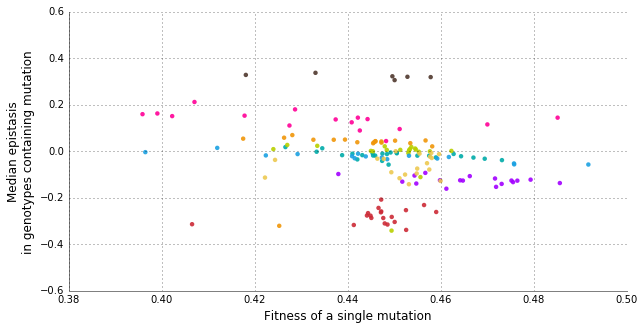

In [62]:
title = 'Fitness of a single mutation vs epistasis'
plot_better()
for single_fitnesses, median_epistasis, segment_name in single_fitness_vs_epistasis:
    plt.scatter(single_fitnesses, median_epistasis, 
                edgecolors='none', alpha=0.9, color=segment_colors[segment_name.split('_')[0]])
plt.xlabel('Fitness of a single mutation', fontsize=12)
plt.ylabel('Median epistasis\nin genotypes containing mutation', fontsize=12)
plt.xlim(0.38,0.5)
save_image(image_counter, title, figures_folder, notebook_prefix)